<a href="https://colab.research.google.com/github/yagnik99/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Yagnik_Pandya_Team_2_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Capstone Project 3/'

In [ ]:
bike_data = pd.read_csv(folder + 'SeoulBikeData.csv', engine='python')

In [ ]:
bike_data.head(3)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Rename columns
bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count', 'Temperature(�C)' : 'Temp_C', 'Humidity(%)' : 'Humidity_Percentage', 'Wind speed (m/s)':'Wind_speed', 'Visibility (10m)': 'Visibility', 'Dew point temperature(�C)': 'Dew_point_Temp', 'Solar Radiation (MJ/m2)':'Solar_Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Functioning Day':'Functioning_Day'}, inplace=True)

In [ ]:
import datetime

In [ ]:
pd.DatetimeIndex(bike_data['Date']).max()

Timestamp('2018-12-11 00:00:00')

In [ ]:
pd.DatetimeIndex(bike_data['Date']).min()

Timestamp('2017-01-12 00:00:00')

In [ ]:
# Duration of Data
pd.DatetimeIndex(bike_data['Date']).max() - pd.DatetimeIndex(bike_data['Date']).min()

Timedelta('698 days 00:00:00')

###Checking for any incorrect data.

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] != 0)])

0

In [ ]:
len(bike_data[bike_data['Rented_Bike_Count'] < 0])

0

In [ ]:
len(bike_data[(bike_data['Functioning_Day'] == 'No') & (bike_data['Rented_Bike_Count'] == 0)])

295

In [ ]:
bike_data = bike_data[bike_data['Functioning_Day'] == 'Yes']

In [ ]:
bike_data.drop('Functioning_Day', axis = 1, inplace =True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


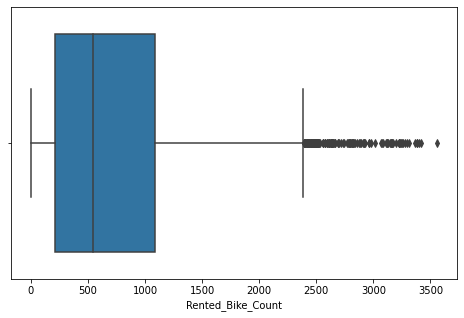

In [ ]:
# Outliers
sns.boxplot(bike_data['Rented_Bike_Count'])

###Exploring catagorical variables.

Text(0, 0.5, 'Counts')

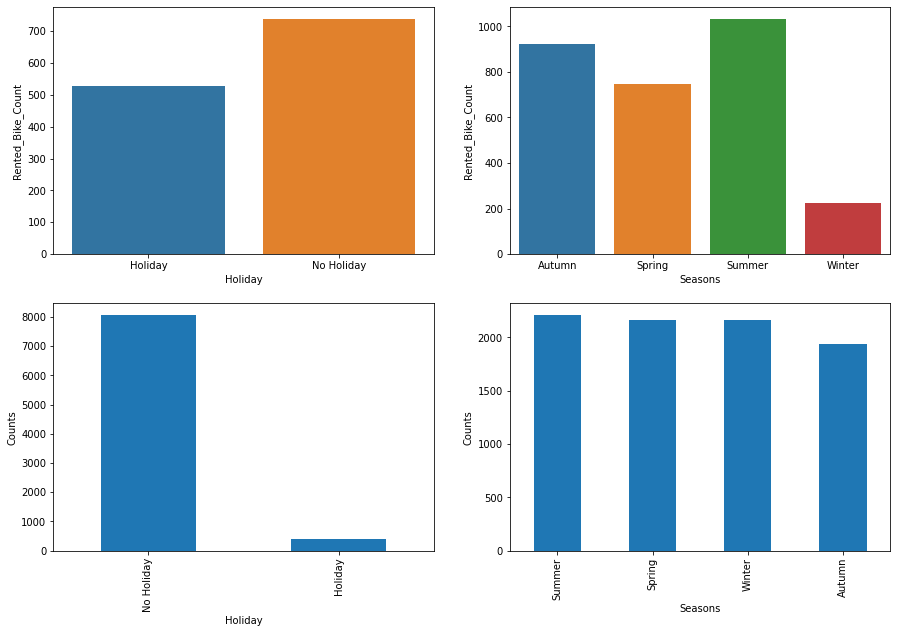

In [ ]:
Holiday_rent = pd.DataFrame(bike_data.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(bike_data.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'])

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
bike_data['Holiday'].value_counts().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
bike_data['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

###Exploring numerical variables

In [ ]:
numerical_features = ['Hour', 'Temp_C', 'Humidity_Percentage',
       'Wind_speed', 'Visibility', 'Dew_point_Temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)

In [ ]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

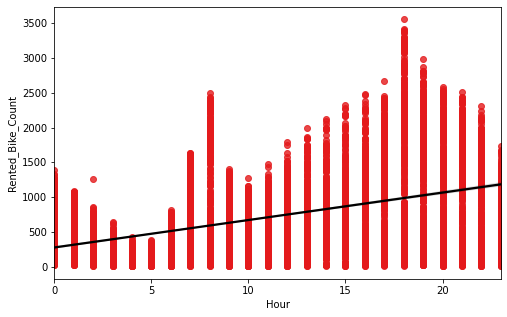

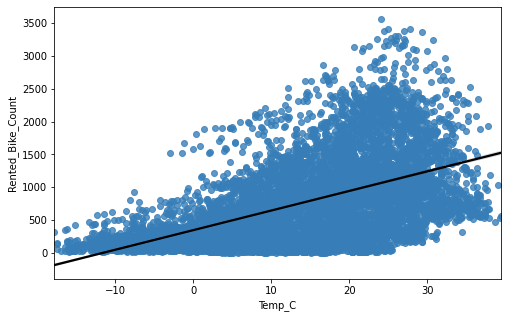

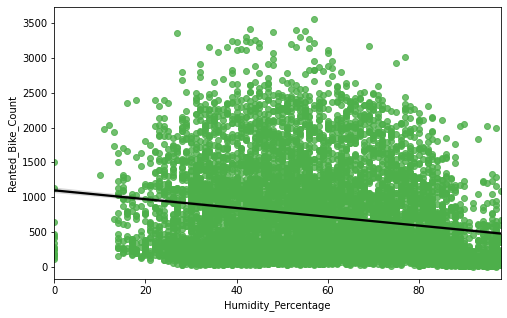

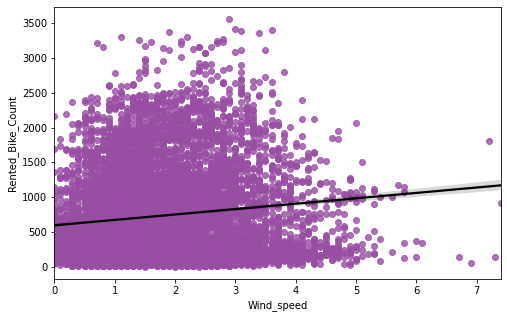

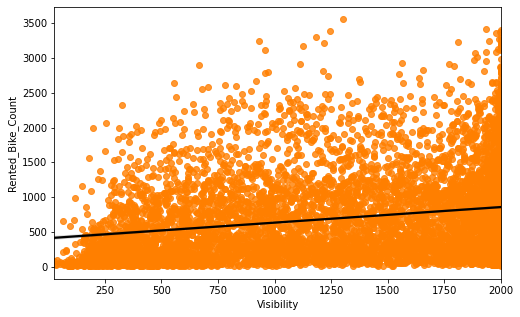

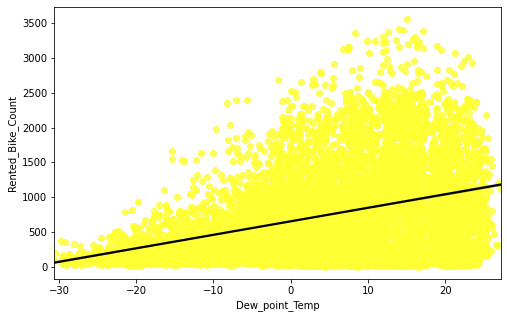

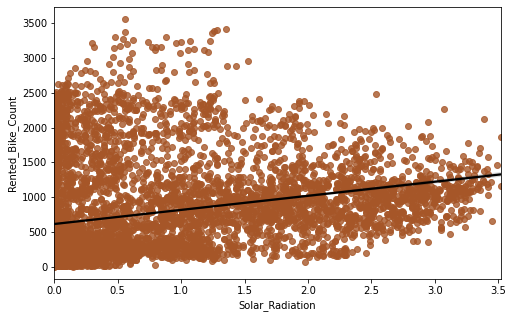

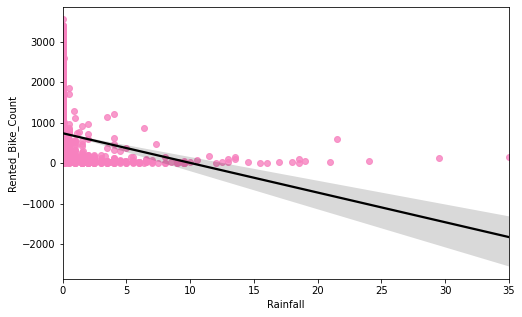

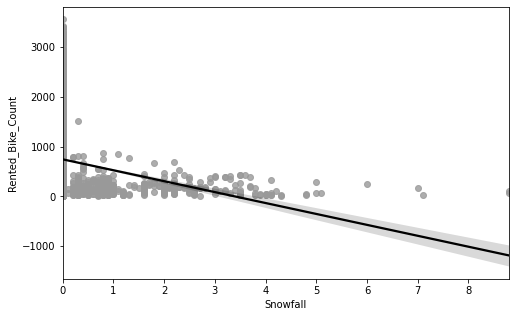

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

###**Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


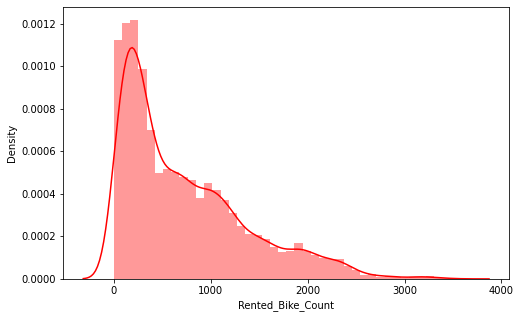

In [ ]:
sns.distplot(bike_data['Rented_Bike_Count'], color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

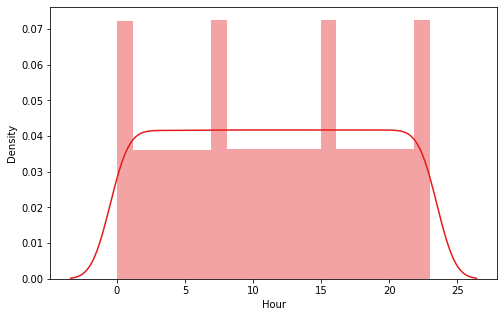

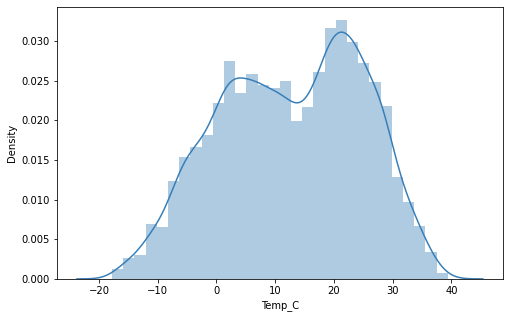

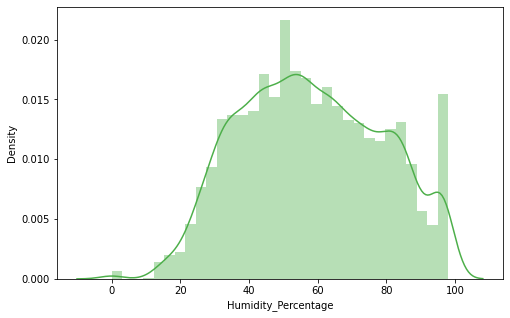

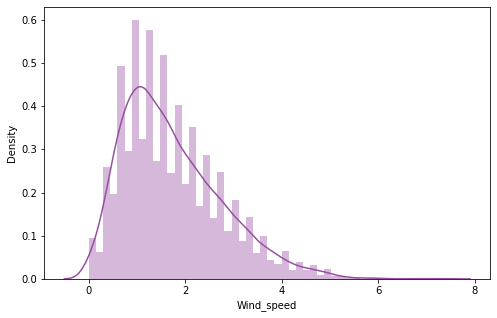

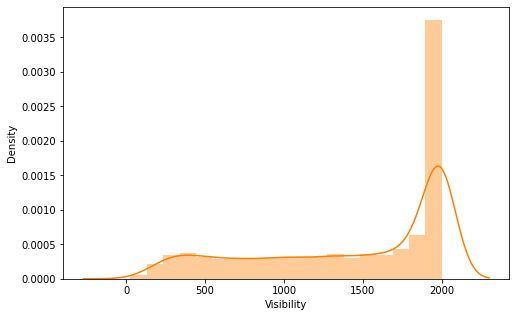

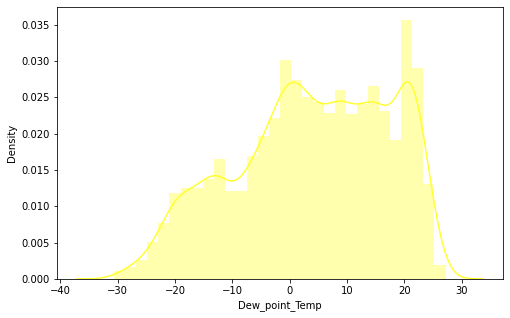

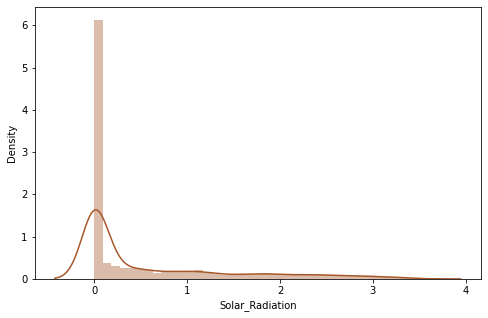

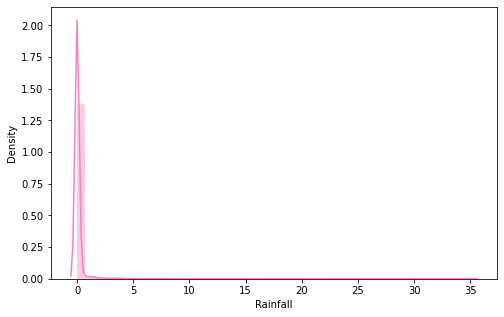

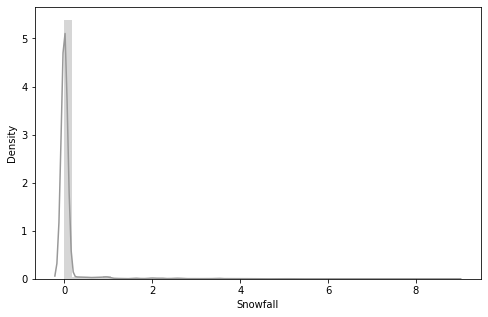

In [ ]:
# Distributions
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.distplot(bike_data[col], color= color_map[key])

### Trend of Bike Renting

###**Change in Bike Renting with Change in hours**

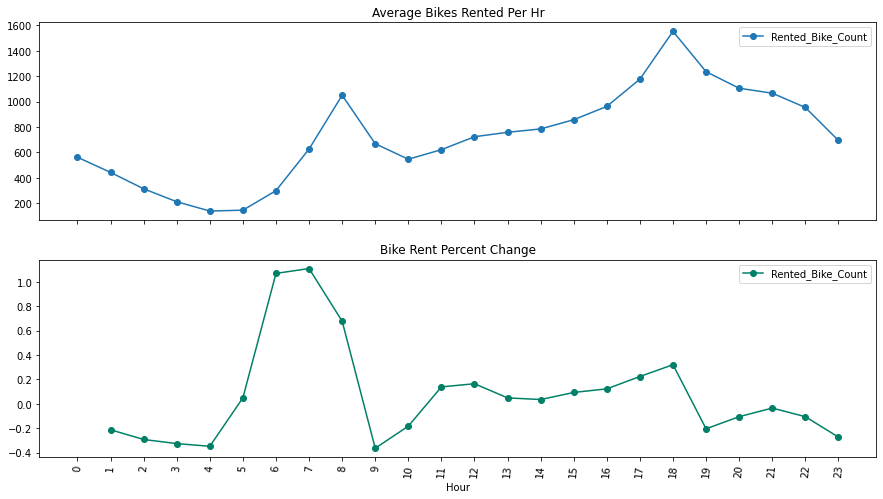

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))


###Change in Bike rent with change in months

Date_temp
01/2018     201.620968
02/2018     225.941964
03/2018     511.551075
04/2018     753.199713
05/2018     982.066667
06/2018    1245.676389
07/2018     987.177419
08/2018     876.192204
09/2018    1079.506410
10/2018     978.458647
11/2018     718.695988
12/2017     249.099462
Name: Rented_Bike_Count, dtype: float64


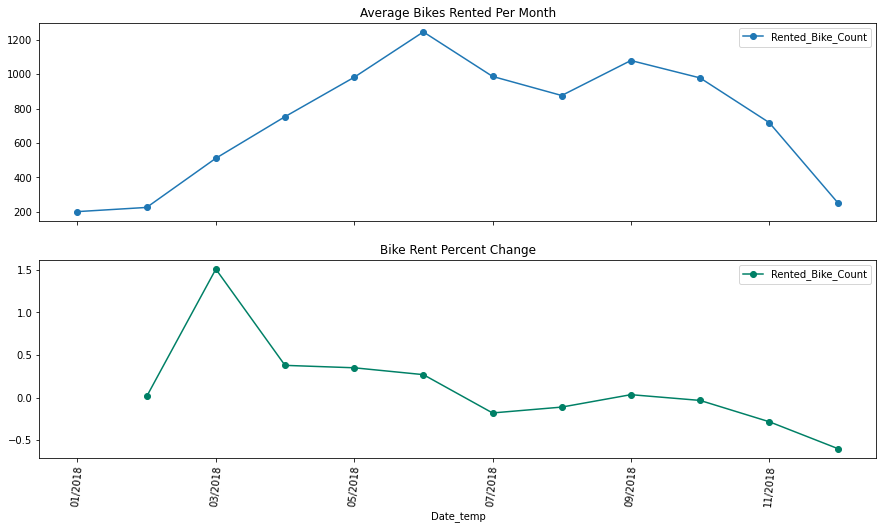

In [ ]:
bike_data['Date_temp'] = bike_data['Date'].apply(lambda x: (str(x)[3:]))

# group by Date(months) and get average Bikes rented
avg_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].mean()
pct_rent_months = bike_data.groupby('Date_temp')['Rented_Bike_Count'].sum().pct_change()
print(avg_rent_months)

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over months
avg_rent_months.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Month")
ax1.set_xticks(range(len(avg_rent_months)))
ax1.set_xticklabels(avg_rent_months.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_months.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")

###Feature Eng.

In [ ]:
# One hot encoding
bike_data = pd.get_dummies(bike_data, columns=['Seasons'], prefix=['Seasons'])

In [ ]:
# Create dummy variables for the catgeorical variable 
bike_data['Holiday'] = np.where(bike_data['Holiday']=='Holiday', 1, 0)

In [ ]:
bike_data.head(3)

,Date,Rented_Bike_Count,Hour,Temp_C,Humidity_Percentage,Wind_speed,Visibility,Dew_point_Temp,Solar_Radiation,Rainfall,Snowfall,Holiday,Date_temp,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,12/2017,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,12/2017,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,12/2017,0,0,0,1


In [ ]:
# Seperating month, year and day from date.
bike_data['Month'] = bike_data['Date'].apply(lambda x: int((str(x)[3:5])))
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = bike_data['Date'].apply(lambda x: int((str(x)[:2])))

In [ ]:
avg_rent_months = pd.DataFrame(bike_data.groupby(['Date_temp', 'Year'])['Rented_Bike_Count'].mean())

In [ ]:
avg_rent_months = avg_rent_months.sort_values(by=['Year'])

In [ ]:
avg_rent_months = pd.DataFrame(avg_rent_months['Rented_Bike_Count'].shift(+1))

In [ ]:
# Rename Column
avg_rent_months.rename(columns={'Rented_Bike_Count':'Prev_month_Bike_rent_counts'}, inplace=True)

In [ ]:
avg_rent_months.reset_index(inplace=True)

In [ ]:
avg_rent_months.drop(['Year'], axis = 1, inplace =True)

In [ ]:
avg_rent_months['Prev_month_Bike_rent_counts'].fillna(225, inplace = True)

In [ ]:
avg_rent_months

,Date_temp,Prev_month_Bike_rent_counts
0,12/2017,225.000000
1,01/2018,249.099462
2,02/2018,201.620968
3,03/2018,225.941964
4,04/2018,511.551075
5,05/2018,753.199713
6,06/2018,982.066667
7,07/2018,1245.676389
8,08/2018,987.177419
9,09/2018,876.192204


In [ ]:
Final_df = pd.merge(bike_data, avg_rent_months, on='Date_temp', how='left')

###Raarranging Final DF

In [ ]:
Final_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temp_C', 'Humidity_Percentage',
       'Wind_speed', 'Visibility', 'Dew_point_Temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Holiday', 'Date_temp', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month', 'Day',
       'Year', 'Prev_month_Bike_rent_counts'],
      dtype='object')

In [ ]:
Final_df.drop(['Date', 'Date_temp', 'Year'], axis = 1, inplace=True)

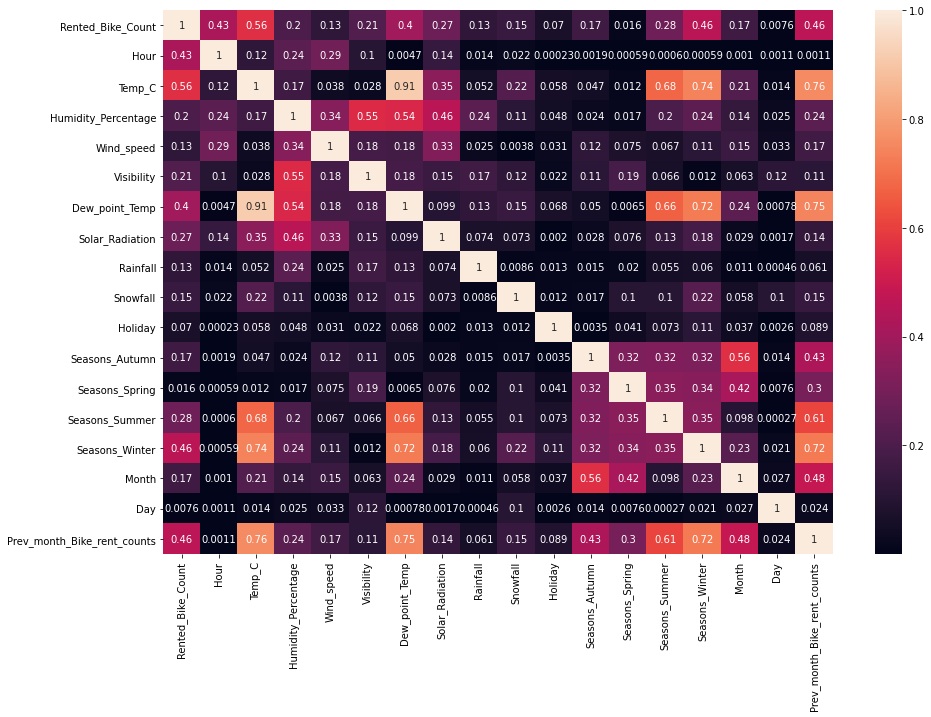

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(Final_df.corr().abs(), annot=True)

In [ ]:
# Saving Final DF
Final_df.to_csv(folder + 'Final_dataset.csv', index= False)

In [ ]:
# Importing saved DF
Final_df_saved = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df_saved.shape

(8465, 18)

###**Base Models**

In [ ]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [ ]:
LR_df['Rented_Bike_Count'] = np.sqrt(LR_df['Rented_Bike_Count'])

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']

###**Statistical Model**

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     866.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:02:30   Log-Likelihood:                -28835.
No. Observations:                8465   AIC:                         5.770e+04
Df Residuals:                    8448   BIC:                         5.782e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          23.3844      1.320     17.711      0.000      20.796      25.973
Hour                            0.5214      0.013     41.344      0.000       0.497       0.546
Temp_C                          0.0562      0.062      0.903      0.366      -0.066       0.178
Humidity_Percentage            -0.2796      0.018    -15.958      0.000      -0.314      -0.245
Wind_speed                      0.1690      0.088      1.924      0.054      -0.003       0.341
Visibility                     -0.0002      0.000     -1.082      0.279      -0.001       0.000
Dew_point_Temp                  0.4321      0.065      6.627      0.000       0.304       0.560
Solar_Radiation                -0.6577      0.130     -5.044      0.000      -0.913      -0.402
Rainfall                       -1.5975      0.074    -21.715      0.000      -1.742      -1.453
Snowfall                        0.2076      0.191      1.084      0.278      -0.168       0.583
Holiday                        -2.8679      0.376     -7.622      0.000      -3.606      -2.130
Seasons_Autumn                  7.8712      0.452     17.413      0.000       6.985       8.757
Seasons_Spring                  7.4697      0.358     20.840      0.000       6.767       8.172
Seasons_Summer                  4.9421      0.488     10.129      0.000       3.986       5.899
Seasons_Winter                  3.1014      0.417      7.441      0.000       2.284       3.918
Month                           0.1304      0.031      4.215      0.000       0.070       0.191
Day                            -0.0087      0.009     -0.938      0.348      -0.027       0.009
Prev_month_Bike_rent_counts     0.0043      0.001      6.792      0.000       0.003       0.005
==============================================================================
Omnibus:                      208.301   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.086
Skew:                           0.242   Prob(JB):                     3.47e-72
Kurtosis:                       3.836   Cond. No.                     6.76e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.34e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Lasso Regression for Feature Importance.**

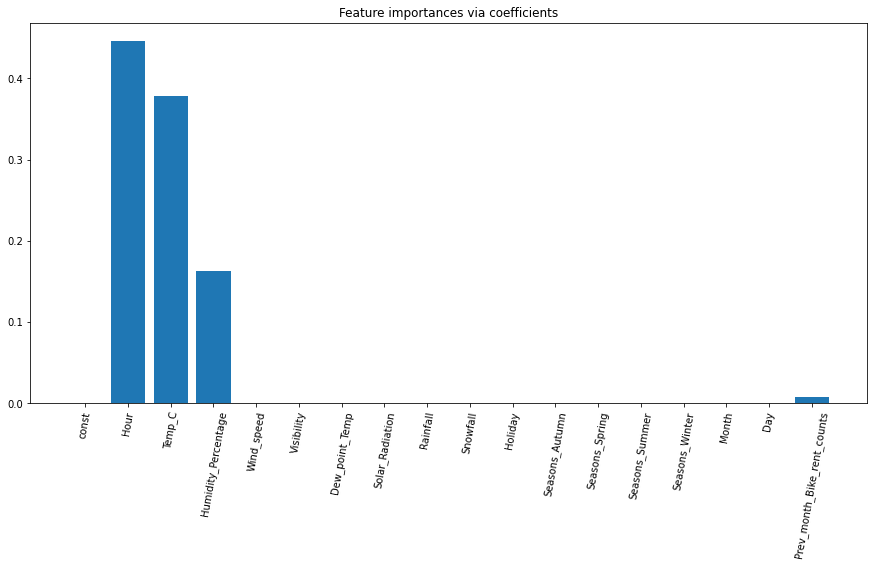

In [ ]:
plt.subplots(figsize=(15,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(lasso).fit(X, y)
feature_names[sfm.get_support()]

Index(['Hour', 'Temp_C', 'Humidity_Percentage', 'Visibility',
       'Prev_month_Bike_rent_counts'],
      dtype='object')

##**Linear Regression**

In [ ]:
# X and Y
X = LR_df.drop(['Rented_Bike_Count'], axis = 1)
y = LR_df['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5925, 17), (2540, 17), (5925,), (2540,))

In [ ]:
# Fitting Multiple Linear Regression to the Training set
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
LR_test_pred = LR_model.predict(X_test)

In [ ]:
# Predicting Train
LR_Train_preds = LR_model.predict(X_train)

In [ ]:
# MSE
mean_squared_error(y_test**2,LR_test_pred**2)

176493.5598378588

In [ ]:
# MSE - Train
mean_squared_error(y_train**2,LR_Train_preds**2)

177757.55142276254

In [ ]:
# R-sqaured for Train
r2_score(y_train**2, LR_Train_preds**2)

0.5725928590037079

In [ ]:
# R-sqaured for Test
r2_score(y_test**2, LR_test_pred**2)

0.5639651491093712

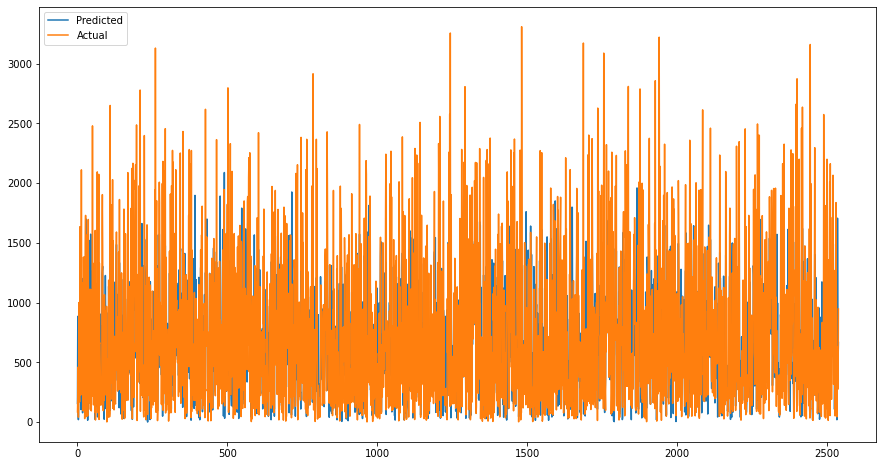

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(LR_test_pred**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

###**Decision Trees**

In [ ]:
X = Final_df_saved.drop(['Rented_Bike_Count'], axis = 1)
y = Final_df_saved['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Importing DT Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting parameters for Grid Search
# Criteria
criterion = ['mse','mae']

# Maximum depth of trees
max_depth = [ 6,8,10,12,15]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse', 'mae'], 'max_depth': [6, 8, 10, 12, 15]}

In [ ]:
# Create an instance of the Decision Tree Regressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring ='r2')

DTR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=6 ......................................
[CV] ....................... criterion=mse, max_depth=6, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   0.0s
[CV] criterion=mse, max_depth=10 .....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... criterion=mse, max_depth=10, total=   0.0s
[CV] criterion=mse, max_depth=12 .....................................
[CV] ...................... criterion=mse, max_depth=12, total=   0.0s
[CV] criterion=mse, max_depth=12 .....................................
[CV] ...................... criterion=mse, max_depth=12, total=   0.0s
[CV] criterion=mse, max_depth=12 .....................................
[CV] ...................... criterion=mse, max_depth=12, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   0.0s
[CV] criterion=mae, max_depth=6 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [6, 8, 10, 12, 15]},
             pre_dispatch='2*n_jobs', refi

In [ ]:
DTR_grid.best_score_

0.7930292675906242

In [ ]:
DTR_grid.best_params_

{'criterion': 'mse', 'max_depth': 8}

In [ ]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

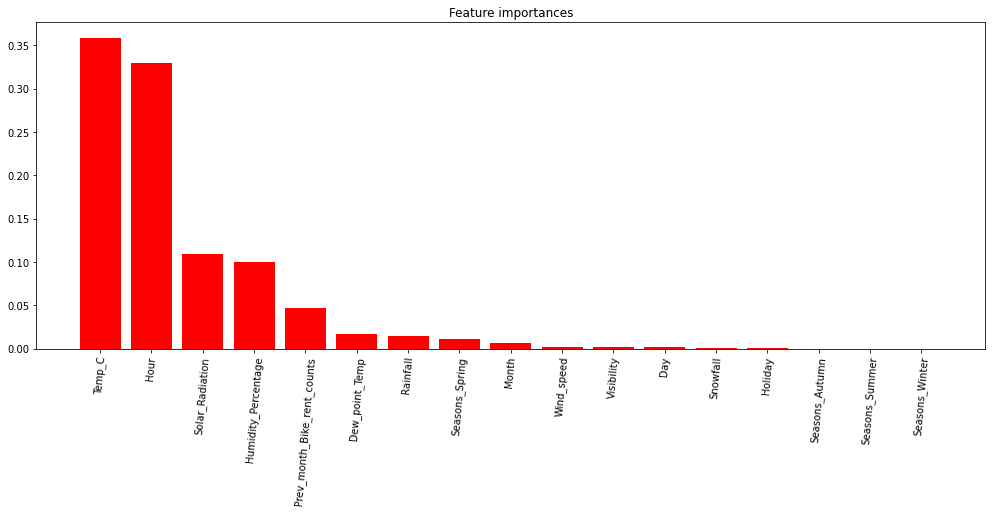

In [ ]:
# Feature importance
feature_importances_DTR = pd.DataFrame(DTR_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_DTR']).sort_values('importance_DTR',
                                                                        ascending=False)
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_DTR.index, feature_importances_DTR['importance_DTR'],
        color="r",  align="center")
plt.xticks(feature_importances_DTR.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Predictions Train and Test
DTR_train_pred = DTR_optimal_model.predict(X_train)
DTR_test_pred = DTR_optimal_model.predict(X_test)

In [ ]:
# MSE - Test 
mean_squared_error(y_test,DTR_test_pred)

87384.13407620875

In [ ]:
# MSE - Train
mean_squared_error(y_train, DTR_train_pred)

51515.26353578626

In [ ]:
# R-sqaured for Train
r2_score(y_train, DTR_train_pred)

0.8761347052247849

In [ ]:
# R-sqaured for Test
r2_score(y_test, DTR_test_pred)

0.784113777822089

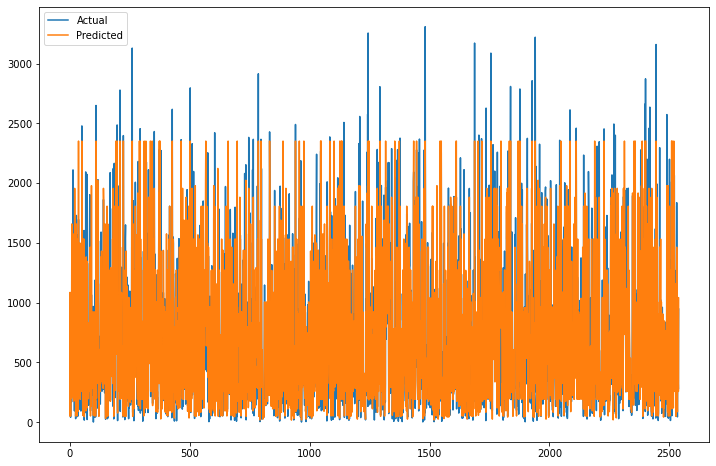

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_test))
plt.plot(DTR_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Criterion
criterion = ['mse', 'mae']
# Maximum depth of trees
max_depth = [6,8,10,12]

# Number of estimator
n_estimators = [50,80,100, 150]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse', 'mae'],
 'max_depth': [6, 8, 10, 12],
 'n_estimators': [50, 80, 100, 150]}

In [ ]:
# Create an instance of the Decision Tree Regressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring ='r2')

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=50 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=50, total=   0.5s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.8s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.8s
[CV] criterion=mse, max_depth=6, n_estimators=80 .....................
[CV] ...... criterion=mse, max_depth=6, n_estimators=80, total=   0.8s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=100, total=   1.0s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] ..... criterion=mse, max_depth=6, n_estimators=100, total=   1.0s
[CV] criterion=mse, max_depth=6, n_estimators=100 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 23.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 12, 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

0.8701846108075619

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
y_pred_train_rf = rf_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,y_pred_test_rf)

54131.829789187344

In [ ]:
# MSE - Train
mean_squared_error(y_train,y_pred_train_rf)

15938.777885565994

In [ ]:
# Test
r2_score((y_test), (y_pred_test_rf))

0.8662650107332577

In [ ]:
# Train
r2_score((y_train), (y_pred_train_rf))

0.9616761851605234

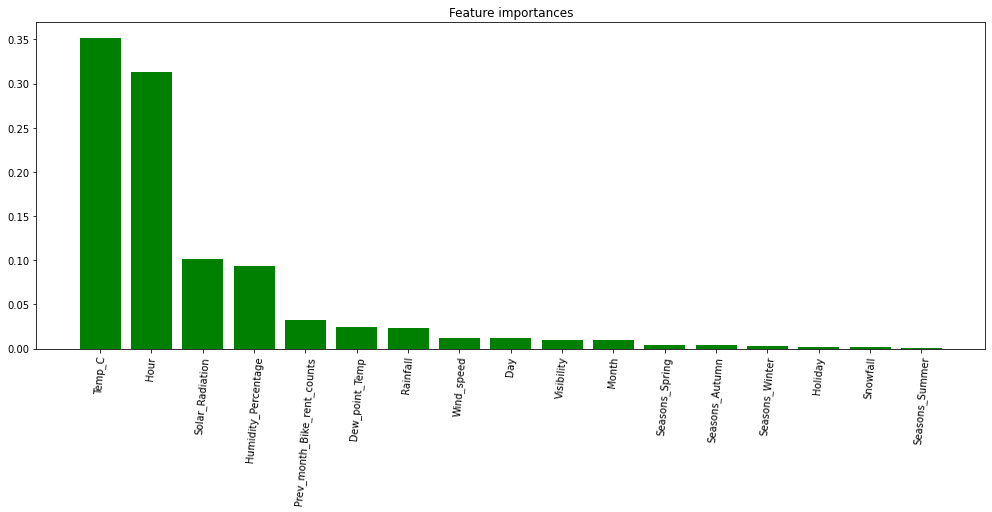

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rf_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

##**SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
# Setting parameters for Grid Search CV

# kernel
kernel = ['rbf','linear','poly']

# C
C = [1, 10, 100, 1000]

# gamma
gamma = ['scale', 'auto', 1e-3, 1e-4]

#epsilon
epsilon = [0.1,0.01,1,0.001]


parameters = { 'kernel' : kernel,
              'C' : C , 'gamma' : gamma, 'epsilon':epsilon
              }

parameters

{'C': [1, 10, 100, 1000],
 'epsilon': [0.1, 0.01, 1, 0.001],
 'gamma': ['scale', 'auto', 0.001, 0.0001],
 'kernel': ['rbf', 'linear', 'poly']}

In [ ]:
# Grid search
SVR_grid = GridSearchCV(estimator=SVR(),
                       param_grid = parameters,
                       cv = 3, verbose=2, scoring= 'r2')

SVR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] C=1, epsilon=0.1, gamma=scale, kernel=rbf .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, epsilon=0.1, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=rbf .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ........ C=1, epsilon=0.1, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=rbf .......................
[CV] ........ C=1, epsilon=0.1, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=linear ....................
[CV] ..... C=1, epsilon=0.1, gamma=scale, kernel=linear, total=   1.0s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=linear ....................
[CV] ..... C=1, epsilon=0.1, gamma=scale, kernel=linear, total=   1.0s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=linear ....................
[CV] ..... C=1, epsilon=0.1, gamma=scale, kernel=linear, total=   1.0s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=poly ......................
[CV] ....... C=1, epsilon=0.1, gamma=scale, kernel=poly, total=   1.2s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=poly ......................
[CV] ....... C=1, epsilon=0.1, gamma=scale, kernel=poly, total=   1.2s
[CV] C=1, epsilon=0.1, gamma=scale, kernel=poly ......................
[CV] .

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 21.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [0.1, 0.01, 1, 0.001],
                         'gamma': ['scale', 'auto', 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=2)

In [ ]:
SVR_grid.best_score_

0.7504085351245937

In [ ]:
SVR_grid.best_params_

{'C': 1000, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svr_optimal_model = SVR_grid.best_estimator_
svr_optimal_model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_y_pred_train = svr_optimal_model.predict(X_train)   # Prediction for train dataset
svr_y_pred_test = svr_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# Feature Importance
features_names = (X.columns.to_list())
from mlxtend.evaluate import feature_importance_permutation
imp_vals, _ = feature_importance_permutation(
    predict_method=svr_optimal_model.predict, 
    X=X_test,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1)

Text(0.5, 1.0, 'SVR Feature importances')

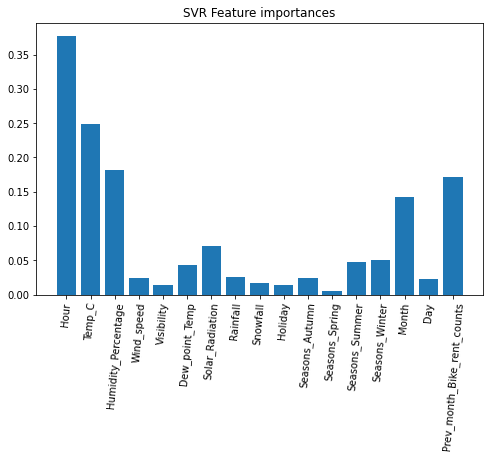

In [ ]:
plt.figure()
plt.bar(features_names, imp_vals)
plt.xticks(features_names, rotation = 85)
plt.title("SVR Feature importances")
#plt.xlim([-1, feature_names.shape[1]])
#plt.ylim([0, 0.5])
#plt.show()

In [ ]:
# MSE - Test 
mean_squared_error(y_test,svr_y_pred_test)

95942.2723267126

In [ ]:
# Test
r2_score(y_test, svr_y_pred_test)

0.7629705330522062

In [ ]:
# Train
r2_score(y_train, svr_y_pred_train)

0.777351869402783

###**XGB**

In [ ]:
import xgboost as xgb

In [ ]:
X = Final_df_saved.drop(['Rented_Bike_Count'], axis = 1)
y = Final_df_saved['Rented_Bike_Count']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Number of trees
n_estimators = [100, 150, 200]

# Maximum depth of trees
max_depth = [6,8, 10]

# Child weight
min_child_weight= [5,6, 8]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict

{'max_depth': [6, 8, 10],
 'min_child_weight': [5, 6, 8],
 'n_estimators': [100, 150, 200]}

In [ ]:
XGB = xgb.XGBRegressor()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2' )

XGB_grid.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=6, min_child_weight=5, n_estimators=100 ...............
[13:03:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_child_weight=5, n_estimators=100, total=   0.6s
[CV] max_depth=6, min_child_weight=5, n_estimators=100 ...............
[13:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=6, min_child_weight=5, n_estimators=100, total=   0.6s
[CV] max_depth=6, min_child_weight=5, n_estimators=100 ...............
[13:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=5, n_estimators=100, total=   0.6s
[CV] max_depth=6, min_child_weight=5, n_estimators=150 ...............
[13:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=5, n_estimators=150, total=   0.8s
[CV] max_depth=6, min_child_weight=5, n_estimators=150 ...............
[13:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_child_weight=5, n_estimators=150, total=   0.8s
[CV] max_depth=6, min_child_weight=5, n_estimators=150 ...............
[13:03:51] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10], 'min_child_weight': [5, 6, 8],
                         'n_estimators': [100, 150,

In [ ]:
XGB_grid.best_score_

0.8844765827281661

In [ ]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 200}

In [ ]:
XGB_optimal_model = XGB_grid.best_estimator_
XGB_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=8, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
XGB_y_pred_train = XGB_optimal_model.predict(X_train)   # Prediction for train dataset
XGB_y_pred_test = XGB_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,XGB_y_pred_test)

47209.002355948316

In [ ]:
# MSE - Train
mean_squared_error(y_train,XGB_y_pred_train)

14106.414677398841

In [ ]:
# Test
r2_score(y_test, XGB_y_pred_test)

0.8833681505326194

In [ ]:
# Test
r2_score(y_train, XGB_y_pred_train)

0.9660819902236619